In [95]:
# pip install scikit-surprise
!pip install matplotlib seaborn


In [46]:
# url = "https://dachang.github.io/CocktailViz/cocktailWheel.JSON"

In [1]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

import pandas as pd
from surprise import Dataset, Reader
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split, PredefinedKFold
from surprise import Dataset, Reader
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
cocktails_file_path = 'cocktails.csv'
cocktails_data = pd.read_csv(cocktails_file_path)

# Replace all cells with '-' with blank
cocktails_data.replace('-', None, inplace=True)

# Display the first few rows of the updated dataset
cocktails_data.head()

,Alcohol,Name,Category,Making,Base Wine,Base Wine Amount,Liquor,Liquor Amount,Juice,Juice Amount,...,Soda Amount,Others,Taste,Type of Glass,Salty,Savory,Sour,Bitter,Sweet,Spicy
0,5,Tequila Sunset,Short,Blend,Tequila,30,None,None,Lemon,30,...,None,Ice,Mild,Champagne Saucer,0,17,83,17,50,0
1,7,Chi-Chi,Long,Shake,Vodka,30,None,None,Pineapple,80,...,None,Coconut Milk,Mild,Armagnac Glasss,0,17,67,0,50,0
2,10,Sex on the Beach,Long,Build,Vodka,15,Melon_20/Raspberry_10,30,Pineapple,80,...,None,None,Mild,Highball,0,0,83,0,50,0
3,10,Horse’s Neck,Long,Build,Brandy,45,None,None,None,None,...,200,Lemon Piece,Mild,Old Fashioned,17,17,83,0,17,0
4,11,EL Diablo,Long,Build,Tequila,30,None,None,None,None,...,250,Orange Piece,Mild,Highball,17,0,50,17,50,0


In [ ]:
# # EDA on cocktails data
# def eda_cocktails(data):
#     print("Cocktails Data Info:")
#     print(data.info())
#     # Summary Statistics
#     print("\nCocktails Data Description:")
#     print(data.describe())

#     for column in data.columns:
#         plt.figure(figsize=(12, 6))
        
#         if data[column].dtype == 'object':
#             # Categorical column - Bar plot
#             data[column].value_counts().plot(kind='bar')
#             plt.title(f'Distribution of {column}')
#             plt.xlabel(column)
#             plt.ylabel('Frequency')
#         else:
#             # Numerical column - Scatter plot
#             plt.scatter(data.index, data[column])
#             plt.title(f'Scatter plot of {column}')
#             plt.xlabel('Index')
#             plt.ylabel(column)
        
#         plt.show()

# # Perform EDA
# eda_cocktails(cocktails_data)

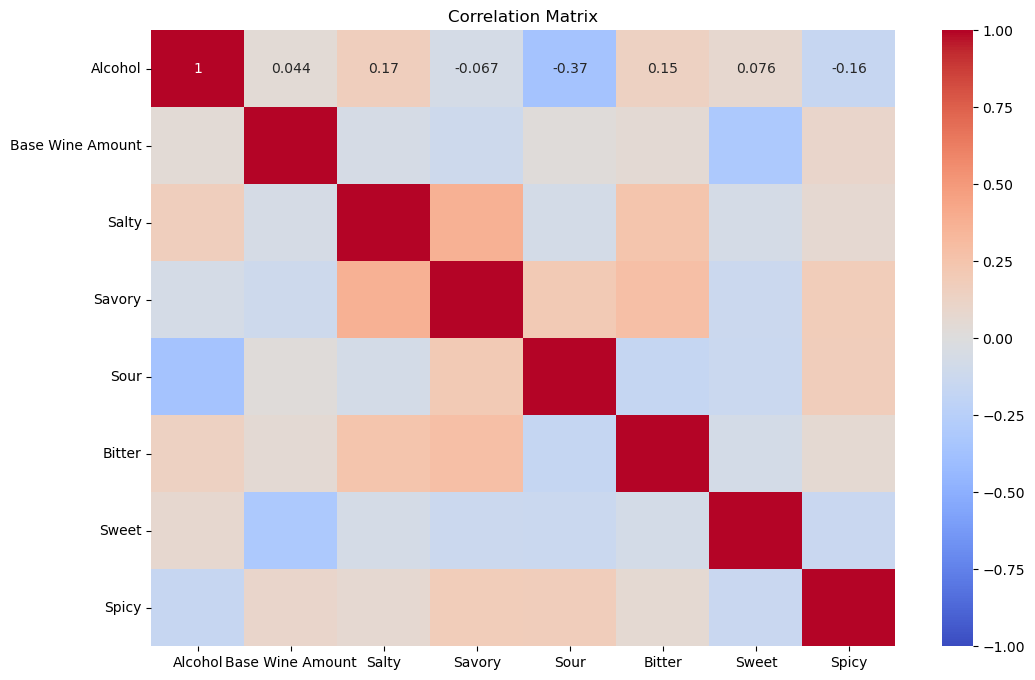

In [5]:
def correlation_analysis(data):
    # Select only numerical columns
    numerical_cols = data.select_dtypes(include=['number']).columns
    # Fill missing values with the mean of the column
    data_filled = data[numerical_cols].fillna(data[numerical_cols].mean())
    
    # Compute the correlation matrix
    corr_matrix = data_filled.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

correlation_analysis(cocktails_data)


In [ ]:
# Content-based filtering

In [6]:
# Selecting relevant features for the recommendation system
features = ['Base Wine', 'Liquor', 'Juice', 'Salty', 'Savory', 'Sour', 'Bitter', 'Sweet', 'Spicy']

# Preparing the data
X = cocktails_data[features].fillna('None')  # Replacing missing values with 'None'

# Pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Base Wine', 'Liquor', 'Juice']),  # One-hot encode categorical data
        ('num', MinMaxScaler(), ['Salty', 'Savory', 'Sour', 'Bitter', 'Sweet', 'Spicy'])  # Scale numerical data
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Check the shape of the processed data to ensure everything is as expected
X_preprocessed.shape

(48, 43)

In [7]:
# print(cocktails_data.columns)
# print(cocktails_data.count())
cocktails_data.head()

,Alcohol,Name,Category,Making,Base Wine,Base Wine Amount,Liquor,Liquor Amount,Juice,Juice Amount,...,Soda Amount,Others,Taste,Type of Glass,Salty,Savory,Sour,Bitter,Sweet,Spicy
0,5,Tequila Sunset,Short,Blend,Tequila,30,None,None,Lemon,30,...,None,Ice,Mild,Champagne Saucer,0,17,83,17,50,0
1,7,Chi-Chi,Long,Shake,Vodka,30,None,None,Pineapple,80,...,None,Coconut Milk,Mild,Armagnac Glasss,0,17,67,0,50,0
2,10,Sex on the Beach,Long,Build,Vodka,15,Melon_20/Raspberry_10,30,Pineapple,80,...,None,None,Mild,Highball,0,0,83,0,50,0
3,10,Horse’s Neck,Long,Build,Brandy,45,None,None,None,None,...,200,Lemon Piece,Mild,Old Fashioned,17,17,83,0,17,0
4,11,EL Diablo,Long,Build,Tequila,30,None,None,None,None,...,250,Orange Piece,Mild,Highball,17,0,50,17,50,0


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(X_preprocessed)

# Create a mapping from cocktail names to index
cocktail_index = pd.Series(cocktails_data.index, index=cocktails_data['Name']).drop_duplicates()

# Function to recommend cocktails based on similarity scores
def recommend_cocktails(cocktail_name, n_recommendations=5):
    idx = cocktail_index[cocktail_name]  # Get the index of the cocktail in the dataframe
    sim_scores = list(enumerate(similarity_matrix[idx]))  # Get the similarity scores for all cocktails
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort the cocktails based on similarity scores
    sim_scores = sim_scores[1:n_recommendations+1]  # Get the scores of the top-n similar cocktails, excluding itself
    cocktail_indices = [i[0] for i in sim_scores]  # Get the cocktail indices
    
    # Return the most similar cocktails
    return cocktails_data['Name'].iloc[cocktail_indices]

# Test the function with a sample cocktail
recommend_cocktails('Tequila Sunset', n_recommendations=5)


8     Tequila Sunrise
31           Gin Fizz
16        Tom Collins
4           EL Diablo
15        Screwdriver
Name: Name, dtype: object

In [9]:
# Set the name of the cocktail you are interested in
cocktail_name = "Sex on the Beach"  # Replace this with any cocktail from the dataset

# Get recommendations
recommended_cocktails = recommend_cocktails(cocktail_name, n_recommendations=5)

# Print the recommended cocktails
print("Recommended cocktails similar to", cocktail_name, ":")
print(recommended_cocktails)


Recommended cocktails similar to Sex on the Beach :
1           Chi-Chi
10        Salty Dog
6       Moscow Mule
15      Screwdriver
13    Vodka & Tonic
Name: Name, dtype: object


In [ ]:
# Generate user ratings

In [12]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split

n = 10000
# Create a fake user-item ratings matrix
np.random.seed(0)
user_ids = ['User' + str(i) for i in range(1, 20000)]  # 20 users
cocktail_names = cocktails_data['Name'].tolist()  # Using cocktail names from your dataset

# Generate random ratings
ratings = {
    'user_id': np.random.choice(user_ids, n, replace=True),
    'item_id': np.random.choice(cocktail_names, n, replace=True),
    'rating': np.random.randint(1, 6, n)  # Ratings between 1 and 5
}
ratings_df = pd.DataFrame(ratings)

ratings_df.to_csv('user_rating_simulated.csv')

# Display the first few rows of the ratings DataFrame
print(ratings_df.head())

     user_id          item_id  rating
0   User2733      Screwdriver       3
1  User10800           Zombie       3
2   User9846  Tequila Sunrise       1
3  User19649        Manhattan       4
4  User13124    Imperial Fizz       4


In [ ]:
# Collaborative Filtering

In [13]:
# Sample for a test data set, reset when you have real data

import pandas as pd
import numpy as np
from surprise import Dataset, Reader
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split

# Create a fake user-item ratings matrix
np.random.seed(42)
user_ids = ['User' + str(i) for i in range(1, 21)]  # 20 users
cocktail_names = cocktails_data['Name'].tolist()  # Using cocktail names from your dataset

# Generate random ratings
test_ratings = {
    'user_id': np.random.choice(user_ids, 100, replace=True),
    'item_id': np.random.choice(cocktail_names, 100, replace=True),
    'rating': np.random.randint(1, 6, 100)  # Ratings between 1 and 5
}
test_ratings_df = pd.DataFrame(ratings)

test_ratings_df.to_csv('test_user_rating_simulated.csv')

# Display the first few rows of the ratings DataFrame
print(test_ratings_df.head())

# Upsample the data to 10,000 records
upsampled_ratings_df = test_ratings_df.sample(n=10000, replace=True, random_state=42)

# Optionally, you can reset the index if you want the index to be in sequential order
upsampled_ratings_df.reset_index(drop=True, inplace=True)

# Save to CSV
upsampled_ratings_df.to_csv('upsampled_user_rating_simulated.csv')

# Display the first few rows of the upsampled ratings DataFrame
print(upsampled_ratings_df.head())
print(upsampled_ratings_df.count())

     user_id          item_id  rating
0   User2733      Screwdriver       3
1  User10800           Zombie       3
2   User9846  Tequila Sunrise       1
3  User19649        Manhattan       4
4  User13124    Imperial Fizz       4
     user_id            item_id  rating
0  User10742       Cosmopolitan       2
1   User3309          Manhattan       2
2  User18108        Mockingbird       1
3  User16013  French Connection       5
4  User13816    Tequila Sunrise       4
user_id    10000
item_id    10000
rating     10000
dtype: int64


In [93]:
# # Steps to Include cGAN:
# # Setup the cGAN Architecture: This involves creating a generator and a discriminator.
# # Train the cGAN: Train the network with real data to learn generating synthetic data.
# # Generate Data: Use the trained generator to create synthetic data.


# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# # Function to build the generator
# def build_generator(z_dim):
#     model = tf.keras.Sequential([
#         layers.Dense(128, input_dim=z_dim, activation='relu'),
#         layers.Dense(3, activation='linear')  # Output dimensions for user_id, item_id, rating
#     ])
#     return model

# # Function to build the discriminator
# def build_discriminator():
#     model = tf.keras.Sequential([
#         layers.Dense(128, input_dim=3, activation='relu'),  # Input dimensions for user_id, item_id, rating
#         layers.Dense(1, activation='sigmoid')
#     ])
#     return model

# # Function to compile the cGAN
# def build_cgan(generator, discriminator):
#     discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
#     discriminator.trainable = False
#     z_dim = 100
#     z = layers.Input(shape=(z_dim,))
#     label = generator(z)
#     validity = discriminator(label)
#     cgan = Model(z, validity)
#     cgan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
#     return cgan

# # Function to train the cGAN
# def train_cgan(generator, discriminator, cgan, data, epochs, batch_size):
#     valid = np.ones((batch_size, 1))
#     fake = np.zeros((batch_size, 1))
#     for epoch in range(epochs):
#         idx = np.random.randint(0, data.shape[0], batch_size)
#         real_data = data[idx]
        
#         z = np.random.normal(0, 1, (batch_size, 100))
#         gen_data = generator.predict(z)
        
#         d_loss_real = discriminator.train_on_batch(real_data, valid)
#         d_loss_fake = discriminator.train_on_batch(gen_data, fake)
#         d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
#         z = np.random.normal(0, 1, (batch_size, 100))
#         g_loss = cgan.train_on_batch(z, valid)
        
#         if (epoch + 1) % 100 == 0:
#             print(f"Epoch: {epoch + 1}, D Loss: {d_loss[0]}, D Acc: {d_loss[1] * 100}, G Loss: {g_loss}")

# # Create a fake user-item ratings matrix
# np.random.seed(42)
# user_ids = np.random.randint(1, 21, 100)  # 20 users
# item_ids = np.random.randint(1, 11, 100)  # Simulate 10 cocktail names
# ratings = np.random.randint(1, 6, 100)  # Ratings between 1 and 5

# data = np.column_stack((user_ids, item_ids, ratings))

# # Build and train cGAN
# z_dim = 100
# generator = build_generator(z_dim)
# discriminator = build_discriminator()
# cgan = build_cgan(generator, discriminator)
# train_cgan(generator, discriminator, cgan, data, epochs=5000, batch_size=32)

# # Generate synthetic data
# z = np.random.normal(0, 1, (10000, z_dim))
# generated_data = generator.predict(z)
# generated_data = np.round(generated_data).astype(int)  # Assuming categorical data needs to be integers

# # Convert generated data to DataFrame
# generated_df = pd.DataFrame(generated_data, columns=['User_ID', 'Item_ID', 'Rating'])
# generated_df.to_csv('generated_user_rating_cgan.csv')
# print(generated_df.head())


# # Explanation:
# # Generator and Discriminator: Two neural networks where the generator tries to create "fake" data and the discriminator tries to distinguish between real and fake data.
# # Training Loop: The cGAN is trained alternately by freezing the discriminator during the generator's training and vice versa.
# # Data Generation: After training, the generator is used to create new data points.
# # Note: This example provides a basic setup. Depending on the complexity of your data and the required level of realism in the generated samples, you may need to fine-tune the architecture, training procedure, and hyperparameters. Additionally, real-world applications may require more sophisticated data handling and preprocessing.


     user_id           item_id  rating
0   User2733  Sex on the Beach       4
1  User10800        Earthquake       1
2   User9846   Tequila Martini       1
3  User19649     Imperial Fizz       4
4  User13124          Brooklyn       4


In [ ]:
# Visualization of Ratings per User
plt.figure(figsize=(12, 6))
sns.countplot(data=ratings_df, x='user_id', order=sorted(ratings_df['user_id'].unique()))
plt.title('Number of Ratings per User')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('User ID')
plt.show()

# Visualization of Ratings per Item
plt.figure(figsize=(12, 6))
sns.countplot(data=ratings_df, x='item_id', order=sorted(ratings_df['item_id'].unique()))
plt.title('Number of Ratings per Item')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Item ID')
plt.show()

# Visualization of Rating Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=ratings_df, x='rating')
plt.title('Distribution of Ratings')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

# Boxplot of Ratings per User
plt.figure(figsize=(12, 6))
sns.boxplot(data=ratings_df, x='user_id', y='rating', order=sorted(ratings_df['user_id'].unique()))
plt.title('Rating Distribution per User')
plt.xticks(rotation=45)
plt.ylabel('Ratings')
plt.xlabel('User ID')
plt.show()

# Boxplot of Ratings per Item
plt.figure(figsize=(12, 6))
sns.boxplot(data=ratings_df, x='item_id', y='rating', order=sorted(ratings_df['item_id'].unique()))
plt.title('Rating Distribution per Item')
plt.xticks(rotation=45)
plt.ylabel('Ratings')
plt.xlabel('Item ID')
plt.show()


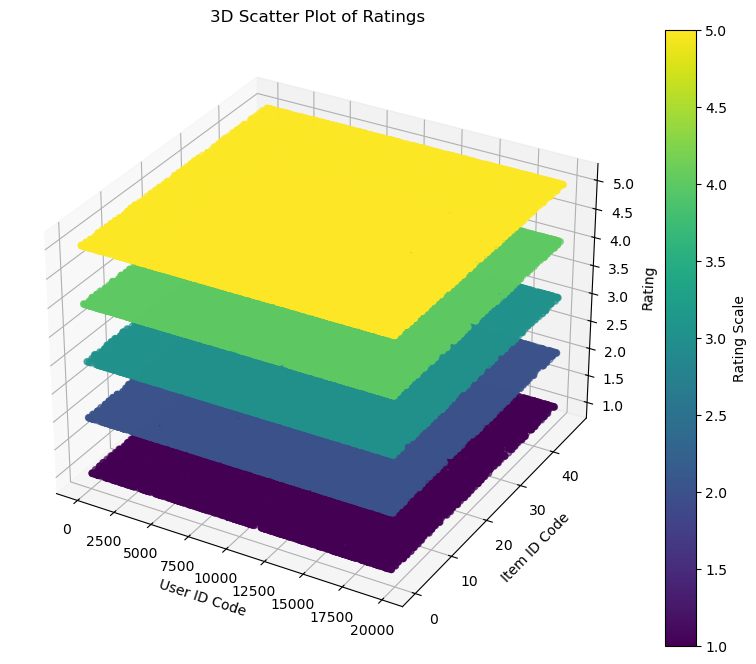

In [101]:

# Convert user IDs and item IDs to categorical codes for plotting
ratings_df['user_id_code'] = pd.Categorical(ratings_df['user_id']).codes
ratings_df['item_id_code'] = pd.Categorical(ratings_df['item_id']).codes

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(ratings_df['user_id_code'], ratings_df['item_id_code'], ratings_df['rating'], c=ratings_df['rating'], cmap='viridis', marker='o')

# Labeling
ax.set_xlabel('User ID Code')
ax.set_ylabel('Item ID Code')
ax.set_zlabel('Rating')
ax.set_title('3D Scatter Plot of Ratings')

# Color bar
cbar = fig.colorbar(scatter, ax=ax, extend='neither', orientation='vertical')
cbar.set_label('Rating Scale')

plt.show()

# Fairly even distribution

In [109]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split, PredefinedKFold
from surprise import Dataset, Reader

# Assuming ratings_df and upsampled_ratings_df are already defined
# Define the reader with the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the original ratings data
data = Dataset.load_from_df(ratings_df[['user_id', 'item_id', 'rating']], reader)
# print(data)

# Load the upsampled data as the full test set
test_data = Dataset.load_from_df(upsampled_ratings_df[['user_id', 'item_id', 'rating']], reader)

# Split the original data into training (90%) and validation set (10%)
trainset, valset = train_test_split(data, test_size=0.1)

# Create the full trainset from the data and prepare the upsampled data as the testset
trainset = data.build_full_trainset()
testset = test_data.construct_testset(test_data.raw_ratings)

In [104]:
# Use the SVD algorithm
model = SVD()

# Train the model on the full training set from the original data
model.fit(trainset)

# Make predictions on the validation set (from the original data)
val_predictions = model.test(valset)

# Calculate RMSE on the validation set
val_rmse = accuracy.rmse(val_predictions)
print(f"Validation RMSE: {val_rmse}")

## On average there is a 0.5 point deviation from actual rating 

# # Make predictions on the test set (from the upsampled data)
# test_predictions = model.test(testset)

# # Calculate RMSE on the test set
# test_rmse = accuracy.rmse(test_predictions)
# print(f"Test RMSE: {test_rmse}")



RMSE: 0.5303
Validation RMSE: 0.5302916403822666


In [86]:
# ratings_df['user_id']

In [ ]:
# # Define a reader and the data
# reader = Reader(rating_scale=(1, 5))  # Rating scale
# data = Dataset.load_from_df(ratings_df[['user_id', 'item_id', 'rating']], reader)

# # Split the data into training and testing set
# trainset, testset = train_test_split(data, test_size=0.25)

# # Use the SVD algorithm
# model = SVD()

# # Train the model
# model.fit(trainset)

# # Make predictions on the test set
# predictions = model.test(testset)

# # Calculate RMSE
# accuracy.rmse(predictions)

In [107]:
ratings_df

,user_id,item_id,rating,user_id_code,item_id_code
0,User2733,Sex on the Beach,4,11821,36
1,User10800,Earthquake,1,886,11
2,User9846,Tequila Martini,1,19673,41
3,User19649,Imperial Fizz,4,10632,19
4,User13124,Brooklyn,4,3444,4
...,...,...,...,...,...
99995,User5807,New York,3,15213,32
99996,User15483,Cherry Blossom,5,6045,5
99997,User1328,Harvard Cooler,3,3614,16
99998,User11666,Margarita,5,1840,24


In [130]:
# # Create a fake user-item ratings matrix
# np.random.seed(10)
# user_ids = ['User' + str(i) for i in range(1, 200)]  # 20 users
# cocktail_names = cocktails_data['Name'].tolist()  # Using cocktail names from your dataset

# # Generate random ratings
# ratings = {
#     'user_id': np.random.choice(user_ids, 100, replace=True),
#     'item_id': np.random.choice(cocktail_names, 100, replace=True),
#     'rating': np.random.randint(1, 6, 100)  # Ratings between 1 and 5
# }
# ratings_df = pd.DataFrame(ratings)

# ratings_df.to_csv('user_rating_simulated2.csv')

# Display the first few rows of the ratings DataFrame
# print(ratings_df.head())

### Below you can find the two drinks with the highest similarity

# Convert records into user-book review score matrix
reviewmatrix = ratings_df.pivot(index="user_id", columns="item_id", values="rating").fillna(0)
# matrix = reviewmatrix.values

# Singular value decomposition
u, s, vh = np.linalg.svd(reviewmatrix.values, full_matrices=False)

# Find the highest similarity
def cosine_similarity(v,u):
    return (v @ u)/ (np.linalg.norm(v) * np.linalg.norm(u))
 
highest_similarity = -np.inf
highest_sim_col = -1
for col in range(1,vh.shape[1]):
    similarity = cosine_similarity(vh[:,0], vh[:,col])
    if similarity > highest_similarity:
        highest_similarity = similarity
        highest_sim_col = col
 
print("Column %d (item id %s) is most similar to column 0 (item id %s)" %
        (highest_sim_col, reviewmatrix.columns[col], reviewmatrix.columns[0])
)


# Compute similarity between all pairs of items
n_items = vh.shape[1]
similarities = np.zeros((n_items, n_items))

for i in range(n_items):
    for j in range(n_items):
        if i != j:
            similarities[i, j] = cosine_similarity(vh[:, i], vh[:, j])
        else:
            similarities[i, j] = 0  # Setting self-similarity to zero for clarity

# Create a DataFrame to display similarities nicely
similarity_df = pd.DataFrame(similarities, index=reviewmatrix.columns, columns=reviewmatrix.columns)

similarity_df.to_csv('similarity_df.csv', index = True)

# print(similarity_df)


Column 1 (item id Zombie) is most similar to column 0 (item id Black Russian)


In [131]:
# # Convert DataFrame to Series and sort values in descending order
# sorted_pairs = similarity_df.unstack().sort_values(ascending=False)

# # Print the pairs in descending order of similarity score
# print(sorted_pairs)


import numpy as np

# Filter out the upper triangle of the DataFrame to avoid duplicates
similarity_df.values[np.triu_indices_from(similarity_df, k=1)] = np.nan

# Convert DataFrame to Series and sort values in descending order
sorted_pairs = similarity_df.unstack().sort_values(ascending=False).dropna()

# Print the pairs in descending order of similarity score
print(sorted_pairs)


item_id          item_id          
John Collins     Salty Dog            9.436896e-16
Cherry Blossom   Sex on the Beach     8.599447e-16
Chi-Chi          Manhattan            6.094995e-16
EL Diablo        Gin & Tonic          5.782928e-16
Singapore Sling  Vodka & Tonic        5.585810e-16
                                          ...     
Cuba Libre       Vodka & Tonic       -5.828671e-16
Miami Beach      Tequila Sunrise     -6.106227e-16
Cuba Libre       Mockingbird         -6.453171e-16
Silk Stockings   Zombie              -7.771561e-16
Cherry Blossom   French Connection   -9.601522e-16
Length: 903, dtype: float64


In [138]:
reviewmatrix.index

Index(['User1', 'User10', 'User101', 'User105', 'User108', 'User109',
       'User113', 'User114', 'User116', 'User119', 'User12', 'User123',
       'User124', 'User126', 'User127', 'User129', 'User13', 'User134',
       'User135', 'User136', 'User138', 'User14', 'User140', 'User141',
       'User142', 'User144', 'User146', 'User147', 'User151', 'User152',
       'User154', 'User157', 'User158', 'User159', 'User16', 'User165',
       'User166', 'User169', 'User17', 'User175', 'User178', 'User180',
       'User183', 'User186', 'User19', 'User198', 'User28', 'User29', 'User31',
       'User32', 'User34', 'User35', 'User37', 'User41', 'User43', 'User45',
       'User46', 'User5', 'User51', 'User55', 'User58', 'User63', 'User65',
       'User66', 'User72', 'User74', 'User75', 'User78', 'User80', 'User86',
       'User87', 'User89', 'User9', 'User90', 'User93', 'User94', 'User95',
       'User97', 'User98'],
      dtype='object', name='user_id')

In [134]:
# Function to recommend cocktails for a user
def recommend_for_user(user_id, n_recommendations=5):
    all_cocktails = set(cocktail_names)
    rated_cocktails = set(ratings_df[ratings_df['user_id'] == user_id]['item_id'])
    unrated_cocktails = list(all_cocktails - rated_cocktails)

    # Predict ratings for all unrated cocktails
    # Generates predicted ratings for each unrated cocktail for the given user.
    predictions = [model.predict(user_id, cocktail).est for cocktail in unrated_cocktails]
    print(predictions)
    recommended_indices = np.argsort(predictions)[::-1][:n_recommendations]  # Top n recommendations
    print(recommended_indices)
    
    return [unrated_cocktails[i] for i in recommended_indices]
    # return recommended_indices

# # # Example: Recommend cocktails for 'User1'
# recommendations = recommend_for_user('User1', 5)
# print("Recommended Cocktails for User1:", recommendations)

# List of users for whom you want to get recommendations
user_list = ['User1', 'User2', 'User3', 'User4', 'User5']

# Loop through each user in the list and print their recommendations
for user in user_list:
    recommendations = recommend_for_user(user, 5)
    print(f"Recommended Cocktails for {user}:", recommendations)


# # Example: Recommend cocktails for multiple users
# user_list = ['User1', 'User2', 'User3']
# recommendations = recommend_for_user(user_list)
# for user, recs in recommendations.items():
#     print(f"Top recommendations for {user}: {recs}")



# Overall, this function takes a user ID as input, finds the cocktails the user hasn't rated, predicts ratings for those cocktails, and then recommends the top-rated cocktails to the user.

[2.046508334940156, 3.1917435139728676, 2.3401911401400564, 2.2696509579471593, 2.8141262262002753, 3.2385736033483217, 2.027981701278877, 2.9137259653977443, 2.9006708592671764, 2.8189685147346877, 2.6493048060963202, 1.8841620028937847, 3.0258616795511957, 2.476461990333753, 1.8818086832618777, 2.7604549672843324, 3.069650556355664, 2.1912634467570795, 2.6298864288738697, 2.978199342886263, 3.262854835668337, 2.8562505918293715, 2.363669260806222, 2.7426824441434263, 2.488559719233526, 2.3272996225550173, 3.1058222387495045, 2.2818122149648747, 2.920415719781194, 3.028430326299316, 2.7029437349728327, 2.574350950891108, 2.4850310127519144, 3.604643369817704, 3.3517525767775314, 2.9220710681672215, 2.4327142197879494, 2.37152813428909, 2.7696333552996495, 2.8431525688618215, 2.941871992805794, 3.095982008480803, 2.4412219821158403, 2.0641716927633733, 4.1797483215008375, 3.437160136208861, 3.089738473632264]
[44 33 45 34 20]
Recommended Cocktails for User1: ['Black Russian', 'Martini'

In [140]:
ratings_df[ratings_df['user_id'] =='User1']

,user_id,item_id,rating
11,User1,Stinger,3


In [ ]:
reviewmatrix[reviewmatrix.index =='User1']

In [141]:
# # Make predictions on the test set (from the upsampled data)
# test_predictions = model.test(testset)

# # Calculate RMSE on the test set
# test_rmse = accuracy.rmse(test_predictions)
# print(f"Test RMSE: {test_rmse}")



RMSE: 1.4949
Test RMSE: 1.49492006393008


In [ ]:
# Deep Learning

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

# Assuming the same fake ratings dataframe from the earlier example
# For demonstration, we're reusing the 'ratings_df' created earlier

# Encoding user IDs and cocktail names
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

ratings_df['user_id_encoded'] = user_encoder.fit_transform(ratings_df['user_id'])
ratings_df['item_id_encoded'] = item_encoder.fit_transform(ratings_df['item_id'])

# Splitting the data
X = ratings_df[['user_id_encoded', 'item_id_encoded']]
y = ratings_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural network architecture
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

user_embedding = Embedding(output_dim=5, input_dim=len(user_encoder.classes_), name='user_embedding')(user_input)
item_embedding = Embedding(output_dim=5, input_dim=len(item_encoder.classes_), name='item_embedding')(item_input)

user_vec = Flatten(name='flatten_users')(user_embedding)
item_vec = Flatten(name='flatten_items')(item_embedding)

concat = Concatenate()([user_vec, item_vec])
fc1 = Dense(128, activation='relu')(concat)
output = Dense(1)(fc1)

model = Model([user_input, item_input], output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit([X_train['user_id_encoded'], X_train['item_id_encoded']], y_train, epochs=10, verbose=1, validation_split=0.1)

# Evaluate the model
model.evaluate([X_test['user_id_encoded'], X_test['item_id_encoded']], y_test)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 10.6559 - val_loss: 10.5644
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.9675 - val_loss: 10.3972
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.5096 - val_loss: 10.2247
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8643 - val_loss: 10.0388
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.0681 - val_loss: 9.8410
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.0371 - val_loss: 9.6301
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.5905 - val_loss: 9.4026
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.8650 - val_loss: 9.1588
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.0023 - val_loss: 8.8975
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.8973 - val_loss: 8.6192
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.0844


10.084400177001953

In [83]:
def make_recommendations(user_id, num_recommendations=5):
    user_idx = user_encoder.transform([user_id])[0]
    all_cocktails_idx = np.array(list(set(ratings_df['item_id_encoded'])))
    user_idx_array = np.array([user_idx for _ in range(len(all_cocktails_idx))])
    predictions = model.predict([user_idx_array, all_cocktails_idx])
    top_ratings_indices = predictions.flatten().argsort()[-num_recommendations:][::-1]
    top_cocktail_ids = item_encoder.inverse_transform(all_cocktails_idx[top_ratings_indices])
    return top_cocktail_ids

# Test recommendations for a user
print("Top recommendations for a user:", make_recommendations('User5'))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Top recommendations for a user: ['John Collins' 'Martini' 'Tom Collins' 'Sex on the Beach' 'Earthquake']


In [84]:
def make_batch_recommendations(user_ids, num_recommendations=5):
    # Transform user_ids to indices
    user_idx = user_encoder.transform(user_ids)
    # Get all cocktails indices
    all_cocktails_idx = np.array(list(set(ratings_df['item_id_encoded'])))
    # Prepare the batch data
    user_idx_array = np.tile(user_idx[:, np.newaxis], (1, len(all_cocktails_idx))).flatten()
    all_cocktails_idx_array = np.tile(all_cocktails_idx, len(user_idx))
    
    # Predict ratings for all combinations
    predictions = model.predict([user_idx_array, all_cocktails_idx_array]).flatten()
    # Reshape predictions to match the number of users and items
    predictions_matrix = predictions.reshape(len(user_idx), len(all_cocktails_idx))
    
    # Get the top recommendations for each user
    top_ratings_indices = np.argsort(predictions_matrix, axis=1)[:, -num_recommendations:]
    
    # Iterate over each user's top indices and decode the cocktail names
    recommendations = {}
    for i, indices in enumerate(top_ratings_indices):
        top_cocktail_ids = item_encoder.inverse_transform(all_cocktails_idx[indices])
        recommendations[user_ids[i]] = top_cocktail_ids

    return recommendations

# Example: Recommend cocktails for multiple users
user_list = ['User1', 'User2', 'User3']
recommendations = make_batch_recommendations(user_list)
for user, recs in recommendations.items():
    print(f"Top recommendations for {user}: {recs}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Top recommendations for User1: ['Earthquake' 'Sex on the Beach' 'Tom Collins' 'Martini' 'John Collins']
Top recommendations for User2: ['Sidecar' 'Sex on the Beach' 'Tom Collins' 'Martini' 'John Collins']
Top recommendations for User3: ['Earthquake' 'Sex on the Beach' 'Tom Collins' 'Martini' 'John Collins']


In [65]:
ratings_df

,user_id,item_id,rating,user_id_encoded,item_id_encoded
0,User13,Vodka & Tonic,4,4,41
1,User16,Old Fashioned,3,7,29
2,User1,Zombie,5,0,43
3,User4,Harvard Cooler,4,14,13
4,User4,Tequila Sunset,4,14,39
...,...,...,...,...,...
95,User3,Mai-Tai,4,13,19
96,User17,Mai-Tai,4,8,19
97,User4,Horse’s Neck,1,14,15
98,User3,Havana Beach,1,13,14


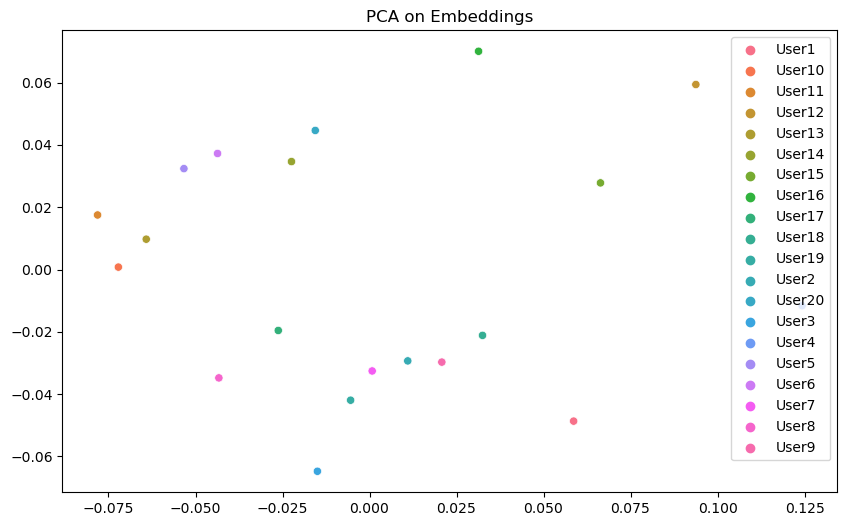

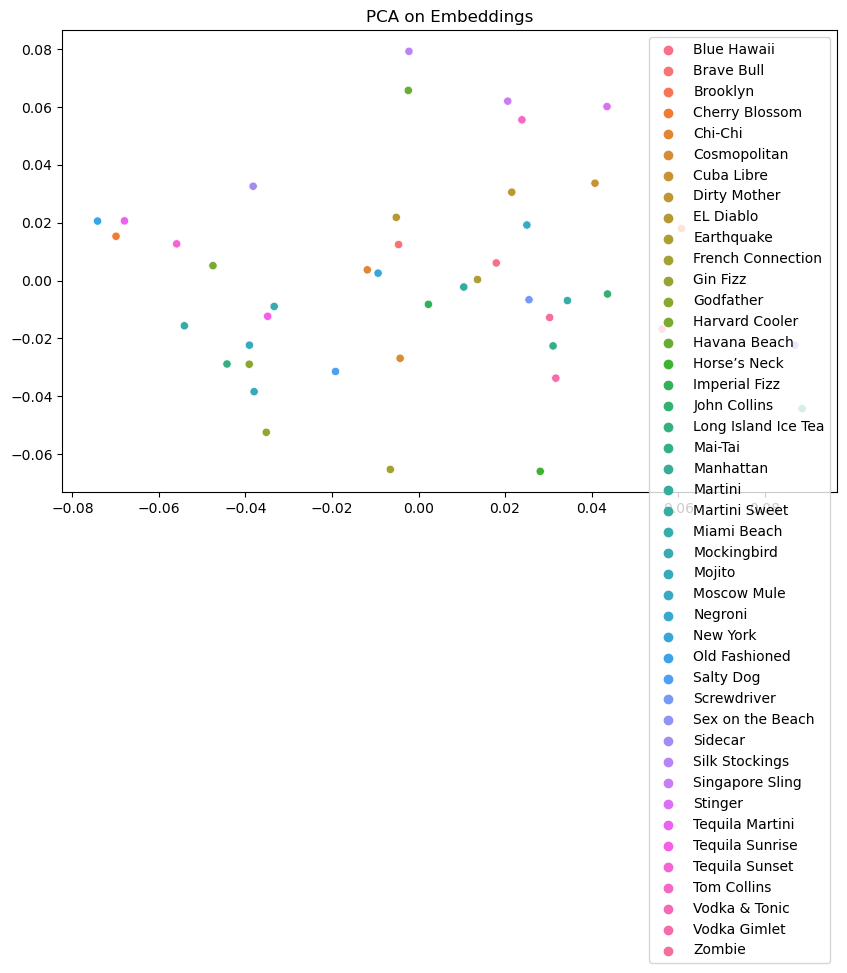

In [64]:
import seaborn as sns
from sklearn.decomposition import PCA

# Use PCA to reduce dimensionality of embeddings for visualization
def visualize_embeddings(embeddings, labels):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels)
    plt.title('PCA on Embeddings')
    plt.show()

# Visualizing user and item embeddings
user_embeddings = model.get_layer('user_embedding').get_weights()[0]
item_embeddings = model.get_layer('item_embedding').get_weights()[0]
visualize_embeddings(user_embeddings, user_encoder.inverse_transform(range(len(user_encoder.classes_))))
visualize_embeddings(item_embeddings, item_encoder.inverse_transform(range(len(item_encoder.classes_))))


In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Function to plot embeddings using t-SNE
def plot_embeddings(embeddings, names, title):
    tsne = TSNE(n_components=2, random_state=42)
    components = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    plt.scatter(components[:, 0], components[:, 1])
    for i, name in enumerate(names):
        plt.annotate(name, (components[i, 0], components[i, 1]))
    plt.title(title)
    plt.grid(True)
    plt.show()

# Extract embeddings
user_embeddings = model.get_layer('user_embedding').get_weights()[0]
item_embeddings = model.get_layer('item_embedding').get_weights()[0]

# Get names for annotations
user_names = user_encoder.inverse_transform(range(len(user_encoder.classes_)))
item_names = item_encoder.inverse_transform(range(len(item_encoder.classes_)))

# Plotting
plot_embeddings(user_embeddings, user_names, 'User Embeddings')
plot_embeddings(item_embeddings, item_names, 'Item (Cocktail) Embeddings')


ValueError: perplexity must be less than n_samples

In [ ]:
# Analyze the dense layer weights
fc1_weights = model.get_layer('dense').get_weights()[0]

# Sum absolute weights to see which input features (post-embedding) have the most influence
feature_importance = np.sum(np.abs(fc1_weights), axis=1)

# Plot feature importance
plt.bar(range(len(feature_importance)), feature_importance)
plt.title('Feature Importance in Dense Layer')
plt.xlabel('Feature Index')
plt.ylabel('Sum of Absolute Weights')
plt.show()